<a href="https://colab.research.google.com/github/oneryigit/tutorials/blob/main/Mapping_Kurds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geocoding Kurdish Ethnic Group using `geopandas`

- Data: Ethnic Power Relations. Source: [here](https://icr.ethz.ch/data/epr/geoepr/)

- The map shows where Kurdish people are located in the world according to EPR dataset. 

In [1]:
#pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

## Reading GEO_EPR Dataset

In [3]:
df= pd.read_csv('GeoEPR-2021.csv')

df.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
0,2,United States of America,1946,1958,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
1,2,United States of America,1946,1958,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...
2,2,United States of America,1946,1958,American Indians,5000,205000,NaN,939761,Regionally based,SRID=4326;MULTIPOLYGON (((-73.91164589888828 4...
3,2,United States of America,1959,1959,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
4,2,United States of America,1959,1959,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...


In [4]:
#Subseting Kurds

kurds=df[df['group']=='Kurds']

kurds

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,SRID=4326;MULTIPOLYGON (((61.0638615 28.668499...
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,SRID=4326;MULTIPOLYGON (((43.33251953 40.55212...
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,SRID=4326;MULTIPOLYGON (((43.91298220996158 37...
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...


In [5]:
kurds['the_geom']=kurds.the_geom.str.replace(r'SRID=4326;','')

kurds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,"MULTIPOLYGON (((61.0638615 28.66849989, 61.057..."
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,"MULTIPOLYGON (((43.33251953 40.55212402, 43.37..."
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,MULTIPOLYGON (((43.91298220996158 37.226591119...
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...


In [6]:
#assigning geometry column from EPR
kurds['the_geom']=gpd.GeoSeries.from_wkt(kurds['the_geom'])
#creating geo DataFrame
kurds_geo=gpd.GeoDataFrame(kurds, geometry=kurds['the_geom'], crs='EPSG:4326')

kurds_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom,geometry
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,"MULTIPOLYGON (((61.06386 28.66850, 61.05754 28...","MULTIPOLYGON (((61.06386 28.66850, 61.05754 28..."
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,"MULTIPOLYGON (((43.33252 40.55212, 43.37311 40...","MULTIPOLYGON (((43.33252 40.55212, 43.37311 40..."
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,"MULTIPOLYGON (((43.91298 37.22659, 43.91298 37...","MULTIPOLYGON (((43.91298 37.22659, 43.91298 37..."
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."


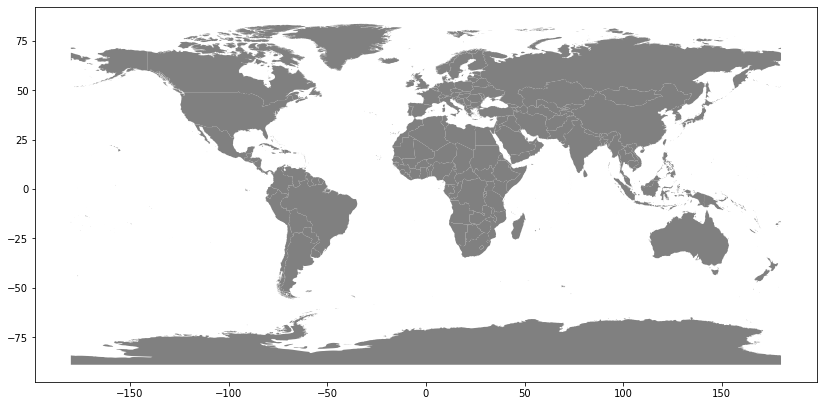

In [7]:
world= gpd.read_file('/content/drive/MyDrive/shapefiles/world/World_Countries__Generalized_.shp')

world.plot(color='gray', figsize=(14,12));

Text(0.5, 1.0, 'The Kurds')

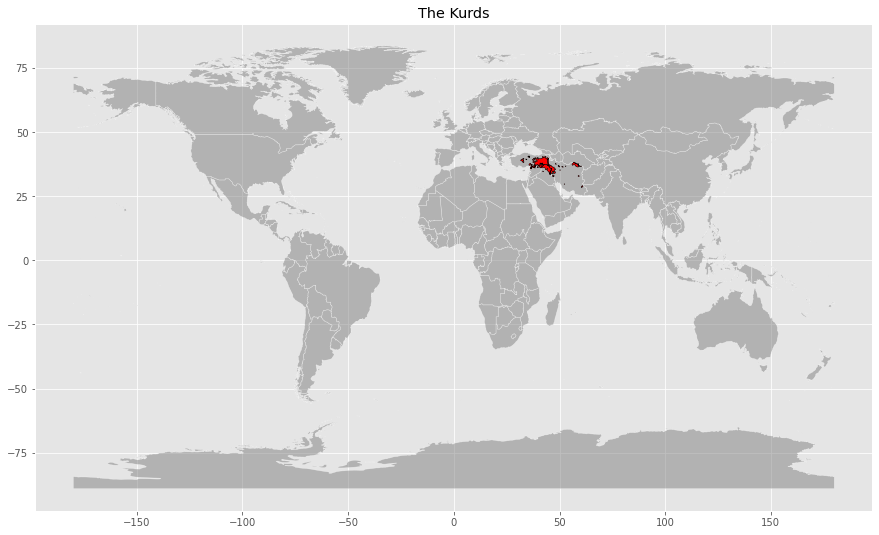

In [8]:
plt.style.use('ggplot')

fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray', edgecolor='w',alpha=0.5) #World
kurds_geo.plot(ax=ax, color='r', edgecolor='k') #Turkey

ax.set_title('The Kurds')

In [9]:
cities= pd.read_csv('/content/drive/MyDrive/shapefiles/capital.csv')

cities

,Country,Capital,Latitude,Longitude
0,Abkhazia,Sukhumi,43.001525,41.023415
1,Afghanistan,Kabul,34.575503,69.240073
2,Aland Islands,Mariehamn,60.100000,19.933333
3,Albania,Tirana,41.327546,19.818698
4,Algeria,Algiers,36.752887,3.042048
...,...,...,...,...
247,Wallis and Futuna,Mata-Utu,-13.282509,-176.176447
248,Western Sahara,El Aaiún,27.125287,-13.162500
249,Yemen,Sana'a,15.369445,44.191007
250,Zambia,Lusaka,-15.387526,28.322817


In [10]:
city_geo = gpd.GeoDataFrame(cities, 
                            geometry=gpd.points_from_xy(cities.Longitude,cities.Latitude),
                            crs="EPSG:4326")

city_geo

,Country,Capital,Latitude,Longitude,geometry
0,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
1,Afghanistan,Kabul,34.575503,69.240073,POINT (69.24007 34.57550)
2,Aland Islands,Mariehamn,60.100000,19.933333,POINT (19.93333 60.10000)
3,Albania,Tirana,41.327546,19.818698,POINT (19.81870 41.32755)
4,Algeria,Algiers,36.752887,3.042048,POINT (3.04205 36.75289)
...,...,...,...,...,...
247,Wallis and Futuna,Mata-Utu,-13.282509,-176.176447,POINT (-176.17645 -13.28251)
248,Western Sahara,El Aaiún,27.125287,-13.162500,POINT (-13.16250 27.12529)
249,Yemen,Sana'a,15.369445,44.191007,POINT (44.19101 15.36945)
250,Zambia,Lusaka,-15.387526,28.322817,POINT (28.32282 -15.38753)


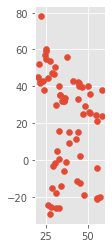

In [11]:
# I only need cities that is between the longitude range where Kurds live.
#so I subset it.  

capitals=city_geo[(city_geo['Longitude']>20) & (city_geo['Longitude']<66)]

capitals.plot()

## Ploting final map

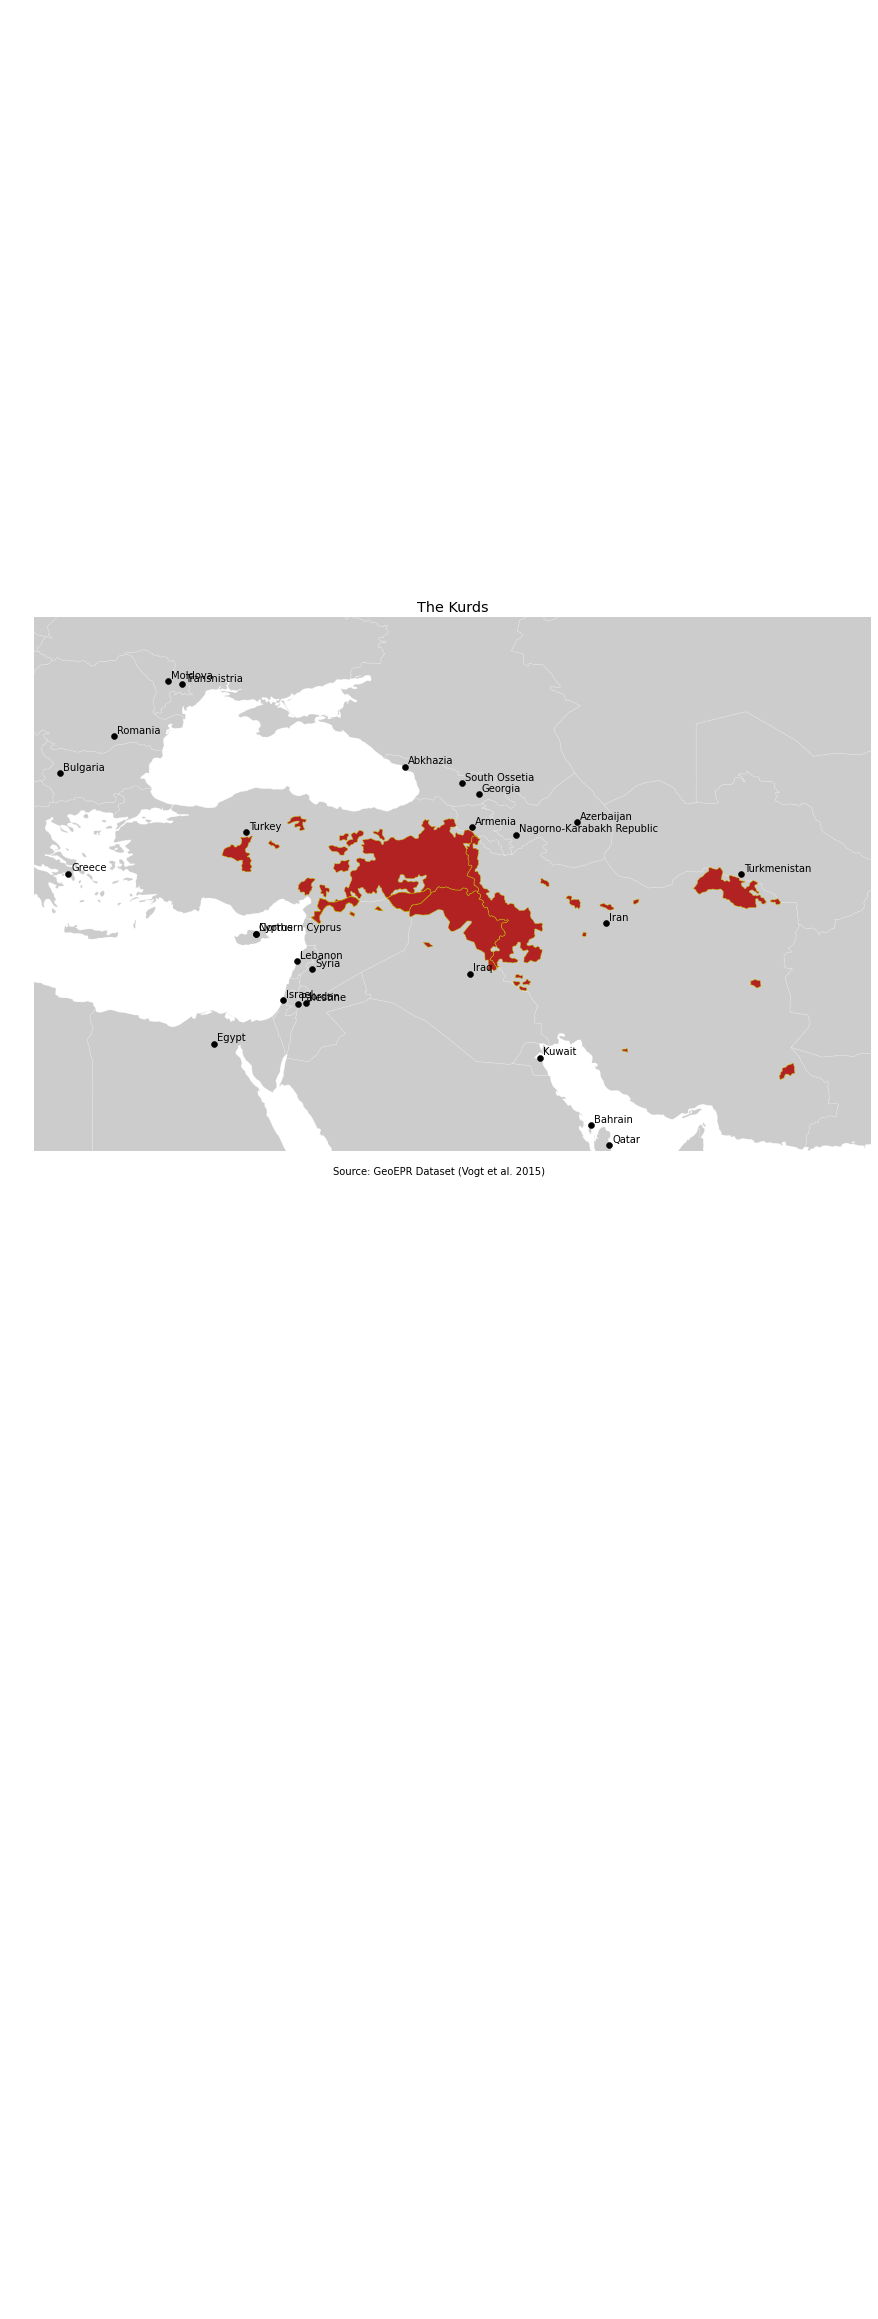

In [13]:
plt.style.use('ggplot')

fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray', edgecolor='w',alpha=0.4) #World
kurds_geo.plot(ax=ax, color='firebrick', edgecolor='y') #Kurds
capitals.plot(ax=ax, color='k')


ax.set_title('The Kurds')
ax.axis([22,65, 25,50])

ax.set_axis_off()

for x, y, label in zip(capitals.geometry.x, capitals.geometry.y, capitals.Country):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

txt="Source: GeoEPR Dataset (Vogt et al. 2015)"
plt.figtext(0.5, 0.10, txt, wrap=True, horizontalalignment='center', fontsize=10);

fig.savefig('Kurds_geocoding.pdf')